# Robiul Islam Jubaer
Id- 2125051097

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.io import imread
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Set dataset path
data_dir = '/content/drive/MyDrive/Autumn 2024/Machine Learning/project/Dataset'

In [5]:
# Load dataset and preprocess
categories = os.listdir(data_dir)
image_size = (128, 128)

In [6]:
# Prepare data arrays
images = []
labels = []

for label, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    for file_name in os.listdir(category_path):
        file_path = os.path.join(category_path, file_name)
        try:
            img = imread(file_path)
            img_resized = np.resize(img, (*image_size, 3))  # Ensure 3 channels
            images.append(img_resized)
            labels.append(label)
        except Exception as e:
            print(f"Error reading file {file_name}: {e}")

images = np.array(images)
labels = np.array(labels)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [8]:
# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# One-hot encode labels
y_train_encoded = to_categorical(y_train, num_classes=len(categories))
y_test_encoded = to_categorical(y_test, num_classes=len(categories))


In [10]:
# Conventional ML Approach: Feature Extraction (HOG) + SVM
from sklearn.svm import SVC

In [24]:
# Extract HOG features
X_train_hog = np.array([hog(rgb2gray(img), pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True) for img in X_train])
X_test_hog = np.array([hog(rgb2gray(img), pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True) for img in X_test])

In [25]:
# Train SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_hog, y_train)

SVC(kernel='linear')

In [26]:
# Evaluate SVM
svm_predictions = svm_clf.predict(X_test_hog)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions) * 100, "%")
print("Classification Report for SVM:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 30.0 %
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.38      0.23      0.29        26
           1       0.33      0.33      0.33        18
           2       0.30      0.56      0.39        18
           3       0.15      0.11      0.13        18

    accuracy                           0.30        80
   macro avg       0.29      0.31      0.29        80
weighted avg       0.30      0.30      0.29        80



In [14]:
# CNN Approach
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*image_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
data_gen.fit(X_train)


In [17]:
# Train CNN
history = cnn_model.fit(
    data_gen.flow(X_train, y_train_encoded, batch_size=32),
    validation_data=(X_test, y_test_encoded),
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2428 - loss: 2.7663 - val_accuracy: 0.2500 - val_loss: 1.4019
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2707 - loss: 1.3615 - val_accuracy: 0.2375 - val_loss: 1.3794
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3431 - loss: 1.2992 - val_accuracy: 0.2500 - val_loss: 1.3972
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3206 - loss: 1.3645 - val_accuracy: 0.2875 - val_loss: 1.3551
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 966ms/step - accuracy: 0.3077 - loss: 1.3245 - val_accuracy: 0.2250 - val_loss: 1.3761
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2792 - loss: 1.3414 - val_accuracy: 0.2250 - val_loss: 1.3631
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.3660 - loss: 1.2909 - val_accuracy: 0.3125 - val_loss: 1.3596
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3541 - loss: 1.2701 - val_accuracy: 0.2750 - val_loss: 1.3490


In [21]:
# Evaluate CNN
cnn_eval = cnn_model.evaluate(X_test, y_test_encoded)
print("CNN Accuracy:", cnn_eval[1] * 100, "%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.3570 - loss: 1.3381
CNN Accuracy: 36.250001192092896 %


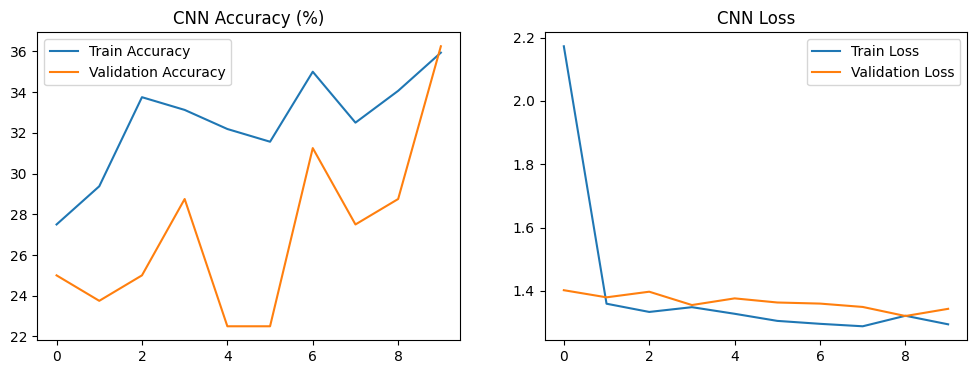

In [23]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.array(history.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.title('CNN Accuracy (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.legend()

plt.show()
